In [2]:
import os
from pathlib import Path
import glob
from google.colab import drive
drive.mount('/content/drive')
import glob

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch

In [12]:
!pip install scikit-learn

In [13]:
!pip install tensorflow

In [14]:
!pip install pandas

In [21]:
embeddingspath = Path('/content/drive/MyDrive/ConfDiff/codnas_data/embeddings.csv')

In [17]:
file_list = {}
print(list(embeddingspath.glob("*")))
for file in embeddingspath.glob("*.pt"):
  ptfile = torch.load(file)
  tensor = ptfile['mean_representations'][33]
  file_list[str(file).splice()] = tensor




[PosixPath('/content/drive/MyDrive/ConfDiff_Test/New_ESM_Embeddings/Copy of 7L55_A_11_19190.pt'), PosixPath('/content/drive/MyDrive/ConfDiff_Test/New_ESM_Embeddings/Copy of 7L55_A_13_19186.pt'), PosixPath('/content/drive/MyDrive/ConfDiff_Test/New_ESM_Embeddings/Copy of 351C_A__15147.pt')]
{PosixPath('/content/drive/MyDrive/ConfDiff_Test/New_ESM_Embeddings/Copy of 7L55_A_11_19190.pt'): tensor([-0.3595,  0.0574, -0.1207,  ..., -0.1315, -0.0959,  0.4418]), PosixPath('/content/drive/MyDrive/ConfDiff_Test/New_ESM_Embeddings/Copy of 7L55_A_13_19186.pt'): tensor([-0.3595,  0.0574, -0.1207,  ..., -0.1315, -0.0959,  0.4418]), PosixPath('/content/drive/MyDrive/ConfDiff_Test/New_ESM_Embeddings/Copy of 351C_A__15147.pt'): tensor([-0.2833,  0.0347,  0.0605,  ..., -0.2667,  0.0778, -0.2769])}


In [15]:
import pandas as pd

In [38]:
esmdf = pd.read_csv(embeddingspath)

In [39]:
esmdf.head()

,cluster_id,seq,emb
0,4JNE_A_seqs,MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...,[-4.10474896e-01 3.31857167e-02 9.59331468e-...
1,1Y7J_A_seqs,CVATRNSCKPAAAACCDPCASCYCRFFRSACYCRVLSLNC,[-1.20606035e-01 -1.70516804e-01 -5.42474240e-...
2,2LK0_A_seqs,XKFEDWLCNKCCLNNFRKRLKCFRCGADKFDXX,[ 4.30405140e-02 6.27131239e-02 2.73098916e-...
3,2N1W_A_seqs,MADEKPKEGVKTENNDHINLKVAGQDGSVVQFKIKRHTPLSKLMKA...,[-1.80795610e-01 1.69708971e-02 2.62443423e-...
4,2KB7_P_seqs,AMEKVQYLTRSAIRRASTIEMPQQARQNLQNLFINFALILIFLLLI...,[ 7.80391544e-02 1.21721532e-02 2.30344772e-...


In [40]:
import ast
import numpy as np
def convert_to_array(s):
    s = s[1:-1].split()
    return np.array([float(string) for string in s])

In [41]:
esmdf['emb'] = esmdf['emb'].apply(convert_to_array)

In [42]:
esmdf.head()

,cluster_id,seq,emb
0,4JNE_A_seqs,MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...,"[-0.410474896, 0.0331857167, 0.0959331468, -0...."
1,1Y7J_A_seqs,CVATRNSCKPAAAACCDPCASCYCRFFRSACYCRVLSLNC,"[-0.120606035, -0.170516804, -0.054247424, 0.1..."
2,2LK0_A_seqs,XKFEDWLCNKCCLNNFRKRLKCFRCGADKFDXX,"[0.043040514, 0.0627131239, 0.273098916, 0.086..."
3,2N1W_A_seqs,MADEKPKEGVKTENNDHINLKVAGQDGSVVQFKIKRHTPLSKLMKA...,"[-0.18079561, 0.0169708971, 0.262443423, 0.130..."
4,2KB7_P_seqs,AMEKVQYLTRSAIRRASTIEMPQQARQNLQNLFINFALILIFLLLI...,"[0.0780391544, 0.0121721532, 0.230344772, 0.18..."


In [43]:
from sklearn.manifold import TSNE

In [44]:
nparrays = []

for array in esmdf['emb']:
  nparrays.append(array)



In [45]:
nparrays

Output hidden; open in https://colab.research.google.com to view.

In [48]:
np.concatenate(nparrays)

array([-0.4104749 ,  0.03318572,  0.09593315, ...,  0.02024364,
        0.06056527, -0.00835804])

In [49]:
arraymatrix = np.stack(nparrays)

In [50]:
arraymatrix

array([[-0.4104749 ,  0.03318572,  0.09593315, ...,  0.34662652,
         0.07151002, -0.00069337],
       [-0.12060604, -0.1705168 , -0.05424742, ...,  0.06134847,
         0.24285123,  0.01661213],
       [ 0.04304051,  0.06271312,  0.27309892, ...,  0.02891088,
         0.31395534, -0.07966845],
       ...,
       [-0.03369252, -0.11830694,  0.12608702, ...,  0.13235839,
         0.01806384,  0.02419951],
       [ 0.11401437, -0.06478733, -0.01955534, ..., -0.05913384,
         0.04242823, -0.00903395],
       [-0.0464622 , -0.0294468 ,  0.24401011, ...,  0.02024364,
         0.06056527, -0.00835804]])

In [52]:
arraymatrix.shape

(1428, 320)

In [57]:
arraydf = pd.DataFrame(arraymatrix)

In [62]:
fulldf = pd.concat((esmdf, arraydf), axis=1)

In [63]:
fulldf

,cluster_id,seq,emb,0,1,2,3,4,5,6,...,310,311,312,313,314,315,316,317,318,319
0,4JNE_A_seqs,MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...,"[-0.410474896, 0.0331857167, 0.0959331468, -0....",-0.410475,0.033186,0.095933,-0.005719,0.263529,-0.222372,0.113481,...,0.334784,-0.076882,0.057535,0.100322,-0.051866,-0.214178,0.023097,0.346627,0.071510,-0.000693
1,1Y7J_A_seqs,CVATRNSCKPAAAACCDPCASCYCRFFRSACYCRVLSLNC,"[-0.120606035, -0.170516804, -0.054247424, 0.1...",-0.120606,-0.170517,-0.054247,0.169115,-0.083974,-0.029052,-0.292030,...,0.018047,-0.037132,0.251559,-0.023448,-0.329342,-0.044794,-0.097121,0.061348,0.242851,0.016612
2,2LK0_A_seqs,XKFEDWLCNKCCLNNFRKRLKCFRCGADKFDXX,"[0.043040514, 0.0627131239, 0.273098916, 0.086...",0.043041,0.062713,0.273099,0.086898,0.078141,-0.089680,-0.133985,...,0.278481,0.006919,0.008307,-0.137636,0.054516,0.050623,-0.090109,0.028911,0.313955,-0.079668
3,2N1W_A_seqs,MADEKPKEGVKTENNDHINLKVAGQDGSVVQFKIKRHTPLSKLMKA...,"[-0.18079561, 0.0169708971, 0.262443423, 0.130...",-0.180796,0.016971,0.262443,0.130744,0.231011,-0.006904,0.064513,...,0.092149,-0.039894,-0.008041,0.239923,0.121017,-0.330453,-0.079301,0.332803,-0.100083,-0.046282
4,2KB7_P_seqs,AMEKVQYLTRSAIRRASTIEMPQQARQNLQNLFINFALILIFLLLI...,"[0.0780391544, 0.0121721532, 0.230344772, 0.18...",0.078039,0.012172,0.230345,0.187580,-0.072888,-0.094295,-0.086954,...,-0.054357,0.158663,0.066739,0.024446,0.239841,-0.094425,-0.149518,0.073371,-0.062255,0.067674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,5TGW_A_seqs,SEFEKLRQTGDELVQAFQRLREIFDKGDDDSLEQVLEEIEELIQKH...,"[-0.141600743, -0.111176781, 0.164327696, -0.0...",-0.141601,-0.111177,0.164328,-0.077571,-0.179621,0.210587,0.254539,...,0.159145,0.062244,-0.205438,0.047975,0.074541,-0.108727,-0.007408,0.200586,-0.149035,-0.120400
1424,2K7D_A_seqs,ADMIGVKELRDAFREFDTNGDGEISTSELREAMRKLLGHQVGHRDI...,"[-0.280211329, -0.0518091097, 0.0606386028, 0....",-0.280211,-0.051809,0.060639,0.019104,0.171784,-0.156096,-0.019325,...,0.212130,-0.019264,-0.161998,0.160244,-0.199251,-0.310337,-0.069346,0.088948,0.072674,-0.093388
1425,1TXY_A_seqs,GSDYENDDECWSVLEGFRVTLTSVIDPSRITPYLRQCKVLNPDDEE...,"[-0.0336925164, -0.118306942, 0.126087025, -0....",-0.033693,-0.118307,0.126087,-0.030906,-0.034607,-0.089234,-0.008786,...,0.035471,-0.039088,0.013559,0.141774,0.149424,-0.066878,-0.016741,0.132358,0.018064,0.024200
1426,1L4W_A_seqs,IVCHTTATSPISAVTCPPGENLCYRKMWCDAFCSSRGKVVELGCAA...,"[0.114014365, -0.0647873282, -0.0195553359, 0....",0.114014,-0.064787,-0.019555,0.058855,0.140326,-0.009135,-0.233913,...,0.255440,0.021266,0.094674,0.006042,-0.085777,-0.136404,0.013186,-0.059134,0.042428,-0.009034


In [64]:
tsne = TSNE(n_components = fulldf.shape[0])

In [65]:
clusterlabels = Path('/content/drive/MyDrive/ConfDiff/codnas_data/train_hot-encoded_merged.csv')

In [67]:
labeldf = pd.read_csv(clusterlabels)

In [68]:
labeldf.head()

,Unnamed: 0,pdb,chain,model,pdb_index,cluster_id,pdb_cluster_id,file_name,causes,seq,emb
0,0,2LC6,A,2.0,14024.0,2LC6_A_seqs,2LC6_A_seqs_0,codnas_groups_pdb/2LC6_A_seqs/2LC6-2-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...
1,1,1RY4,A,8.0,14025.0,2LC6_A_seqs,2LC6_A_seqs_1,codnas_groups_pdb/2LC6_A_seqs/1RY4-8-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...
2,2,2LC6,A,7.0,14026.0,2LC6_A_seqs,2LC6_A_seqs_2,codnas_groups_pdb/2LC6_A_seqs/2LC6-7-A_fixed.pdb,MUTATION,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...
3,3,1RY4,A,10.0,14027.0,2LC6_A_seqs,2LC6_A_seqs_3,codnas_groups_pdb/2LC6_A_seqs/1RY4-10-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...
4,4,2LC6,A,3.0,14028.0,2LC6_A_seqs,2LC6_A_seqs_4,codnas_groups_pdb/2LC6_A_seqs/2LC6-3-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...


In [69]:
labeldf.head()

,Unnamed: 0,pdb,chain,model,pdb_index,cluster_id,pdb_cluster_id,file_name,causes,seq,emb
0,0,2LC6,A,2.0,14024.0,2LC6_A_seqs,2LC6_A_seqs_0,codnas_groups_pdb/2LC6_A_seqs/2LC6-2-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...
1,1,1RY4,A,8.0,14025.0,2LC6_A_seqs,2LC6_A_seqs_1,codnas_groups_pdb/2LC6_A_seqs/1RY4-8-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...
2,2,2LC6,A,7.0,14026.0,2LC6_A_seqs,2LC6_A_seqs_2,codnas_groups_pdb/2LC6_A_seqs/2LC6-7-A_fixed.pdb,MUTATION,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...
3,3,1RY4,A,10.0,14027.0,2LC6_A_seqs,2LC6_A_seqs_3,codnas_groups_pdb/2LC6_A_seqs/1RY4-10-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...
4,4,2LC6,A,3.0,14028.0,2LC6_A_seqs,2LC6_A_seqs_4,codnas_groups_pdb/2LC6_A_seqs/2LC6-3-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,[-1.16966054e-01 -1.14702784e-01 1.88904598e-...


In [90]:
labeldf.shape

(30914, 11)

In [106]:
nparrays = []
def convert_to_array(s):
    s = s[1:-1].split()
    return np.array([float(string) for string in s])

labeldf['emb'].head()
#print(labeldf['emb'].dtypes)

for array in labeldf['emb']:
  nparrays.append(array)

def convert_to_array(s):
    s = s[1:-1].split()
    return np.array([float(string) for string in s])

stacked = np.stack(nparrays)
stackdf = pd.DataFrame(stacked)
stackdf

labelesmdf = pd.concat((labeldf, stackdf), axis=1)


In [113]:
numfloats = 0
for entry in labeldf['emb']:
  if isinstance(entry, float):
    #print('floats present in this data')
    numfloats += 1
    print(entry)
print('number of floats: ', numfloats)

Streaming output truncated to the last 5000 lines.
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [115]:
import math
filtered_df = labeldf.dropna()

In [117]:
filtered_df.shape

(18821, 11)

In [118]:
def convert_to_array(s):
    s = s[1:-1].split()
    return np.array([float(string) for string in s])

filtered_df['emb'] = filtered_df['emb'].apply(convert_to_array)

<ipython-input-118-4d85f0b27342>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['emb'] = filtered_df['emb'].apply(convert_to_array)


,Unnamed: 0,pdb,chain,model,pdb_index,cluster_id,pdb_cluster_id,file_name,causes,seq,emb
0,0,2LC6,A,2.0,14024.0,2LC6_A_seqs,2LC6_A_seqs_0,codnas_groups_pdb/2LC6_A_seqs/2LC6-2-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,"[-0.116966054, -0.114702784, 0.188904598, -0.1..."
1,1,1RY4,A,8.0,14025.0,2LC6_A_seqs,2LC6_A_seqs_1,codnas_groups_pdb/2LC6_A_seqs/1RY4-8-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,"[-0.116966054, -0.114702784, 0.188904598, -0.1..."
2,2,2LC6,A,7.0,14026.0,2LC6_A_seqs,2LC6_A_seqs_2,codnas_groups_pdb/2LC6_A_seqs/2LC6-7-A_fixed.pdb,MUTATION,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,"[-0.116966054, -0.114702784, 0.188904598, -0.1..."
3,3,1RY4,A,10.0,14027.0,2LC6_A_seqs,2LC6_A_seqs_3,codnas_groups_pdb/2LC6_A_seqs/1RY4-10-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,"[-0.116966054, -0.114702784, 0.188904598, -0.1..."
4,4,2LC6,A,3.0,14028.0,2LC6_A_seqs,2LC6_A_seqs_4,codnas_groups_pdb/2LC6_A_seqs/2LC6-3-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,"[-0.116966054, -0.114702784, 0.188904598, -0.1..."


In [120]:
nparrays = []
for array in filtered_df['emb']:
  nparrays.append(array)

def convert_to_array(s):
    s = s[1:-1].split()
    return np.array([float(string) for string in s])

stacked = np.stack(nparrays)
stackdf = pd.DataFrame(stacked)
stackdf

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,-0.116966,-0.114703,0.188905,-0.130944,0.352536,-0.125428,0.001247,0.137414,-0.199114,0.148477,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
1,-0.116966,-0.114703,0.188905,-0.130944,0.352536,-0.125428,0.001247,0.137414,-0.199114,0.148477,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
2,-0.116966,-0.114703,0.188905,-0.130944,0.352536,-0.125428,0.001247,0.137414,-0.199114,0.148477,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
3,-0.116966,-0.114703,0.188905,-0.130944,0.352536,-0.125428,0.001247,0.137414,-0.199114,0.148477,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
4,-0.116966,-0.114703,0.188905,-0.130944,0.352536,-0.125428,0.001247,0.137414,-0.199114,0.148477,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18816,-0.024880,-0.326670,0.229381,0.107461,-0.001185,-0.133606,-0.156651,-0.061147,-0.297662,-0.076061,...,0.184271,-0.201957,0.270211,0.235321,-0.048492,0.294500,0.166802,0.194565,0.266501,0.094321
18817,-0.024880,-0.326670,0.229381,0.107461,-0.001185,-0.133606,-0.156651,-0.061147,-0.297662,-0.076061,...,0.184271,-0.201957,0.270211,0.235321,-0.048492,0.294500,0.166802,0.194565,0.266501,0.094321
18818,-0.024880,-0.326670,0.229381,0.107461,-0.001185,-0.133606,-0.156651,-0.061147,-0.297662,-0.076061,...,0.184271,-0.201957,0.270211,0.235321,-0.048492,0.294500,0.166802,0.194565,0.266501,0.094321
18819,-0.024880,-0.326670,0.229381,0.107461,-0.001185,-0.133606,-0.156651,-0.061147,-0.297662,-0.076061,...,0.184271,-0.201957,0.270211,0.235321,-0.048492,0.294500,0.166802,0.194565,0.266501,0.094321


In [122]:
fulldf = pd.concat((filtered_df, stackdf), axis=1)

In [123]:
fulldf.head()

,Unnamed: 0,pdb,chain,model,pdb_index,cluster_id,pdb_cluster_id,file_name,causes,seq,...,310,311,312,313,314,315,316,317,318,319
0,0,2LC6,A,2.0,14024.0,2LC6_A_seqs,2LC6_A_seqs_0,codnas_groups_pdb/2LC6_A_seqs/2LC6-2-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
1,1,1RY4,A,8.0,14025.0,2LC6_A_seqs,2LC6_A_seqs_1,codnas_groups_pdb/2LC6_A_seqs/1RY4-8-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
2,2,2LC6,A,7.0,14026.0,2LC6_A_seqs,2LC6_A_seqs_2,codnas_groups_pdb/2LC6_A_seqs/2LC6-7-A_fixed.pdb,MUTATION,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
3,3,1RY4,A,10.0,14027.0,2LC6_A_seqs,2LC6_A_seqs_3,codnas_groups_pdb/2LC6_A_seqs/1RY4-10-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989
4,4,2LC6,A,3.0,14028.0,2LC6_A_seqs,2LC6_A_seqs_4,codnas_groups_pdb/2LC6_A_seqs/2LC6-3-A_fixed.pdb,TEMPERATURE,GSKTKAPSISIPHDFRCVSAIIDVDIVPETHRRVRLCKHGSDKPLG...,...,0.318658,0.020707,0.064491,0.210089,-0.169649,-0.066605,-0.108271,0.260395,0.241454,-0.015989


In [126]:
tsne = TSNE(n_components = 2)

In [127]:
tsne

TSNE()

In [130]:
reduced_data = tsne.fit_transform(stackdf[:40])

In [131]:
reduced_data

array([[ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -218.81577 ,  -515.81604 ],
       [ -500.96066 ,   987.219   ],
       [ -500.96066 ,   987.219   ],
       [ -500.96066 ,   987.219   ],
       [ -500.96066 ,   987.219   ],
       [ -500.96066 ,   987.219   ],
       [ -500.96066 ,   987.219   ],
       [ -500.96066 ,   987.219   ],
 

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: ignored

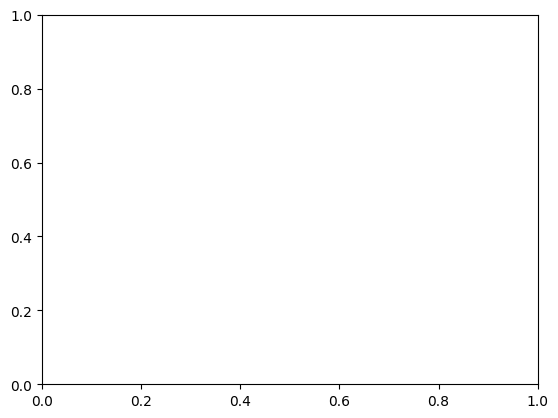

In [144]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=filtered_df['causes'][:40])

In [140]:
import seaborn as sns

<Axes: >

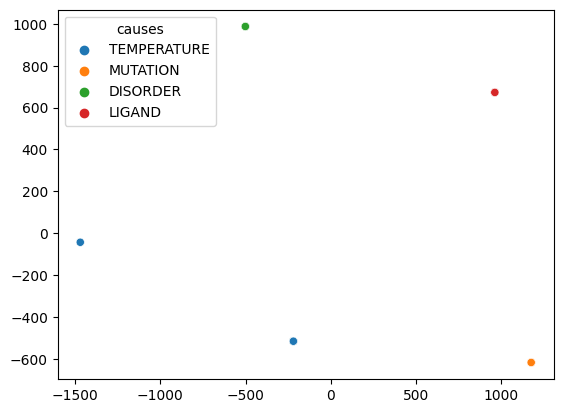

In [145]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=filtered_df['causes'][:40])

In [147]:
fullreduceddata = tsne.fit_transform(stackdf)

In [148]:
fullreduceddata.shape

(18821, 2)

<Axes: >

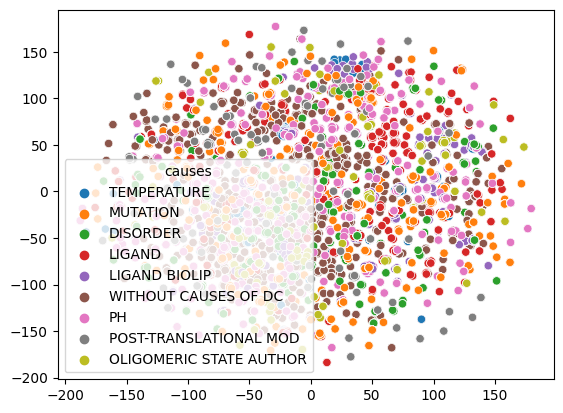

In [149]:
sns.scatterplot(x=fullreduceddata[:, 0], y=fullreduceddata[:, 1], hue=filtered_df['causes'])

In [151]:
from sklearn.preprocessing import StandardScaler
scaledfulldata = StandardScaler().fit_transform(stackdf)

In [152]:
import umap

ModuleNotFoundError: ignored

In [153]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=a59be5cc6eed3e45feb7944a524fdb5e359f4cfb61400a6bb3d470e6a0c0b01b
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=ffc9390e3f75afda406c3d38ee6a22428f2ef9431fd83013eb66302bc60eb9f2
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [154]:
import umap

In [162]:
reducer = umap.UMAP(n_neighbors=150)

In [163]:
umapdata = reducer.fit_transform(stackdf)


In [164]:
umapdata.shape

(18821, 2)

<Axes: >

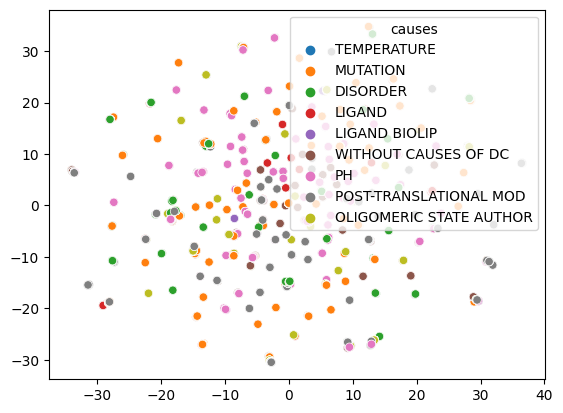

In [165]:
sns.scatterplot(x=umapdata[:, 0], y=umapdata[:, 1], hue=filtered_df['causes'])

In [ ]:
umap.UMAP()